In [6]:
#RESNET 18 TEST
#Import statements
%reload_ext autoreload
%autoreload 2
%matplotlib inline

%config InlineBackend.figure_format = 'retina'
import torch
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
from glob2 import glob
from sklearn.metrics import confusion_matrix


import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
import seaborn as sns
import pickle 


In [7]:
# EXTRACT DATA
files = zf.ZipFile("dataset-resized.zip",'r')
files.extractall()
files.close()

os.listdir(os.path.join(os.getcwd(),"dataset-resized"))

['paper', '.DS_Store', 'trash', 'glass', 'plastic', 'cardboard', 'metal']

In [8]:
# Splitting images into folders
## helper functions ##

## splits indices for a folder into train, validation, and test indices with random sampling
    ## input: folder path
    ## output: train, valid, and test indices    
def split_indices(folder,seed1,seed2):    
    n = len(os.listdir(folder))
    full_set = list(range(1,n+1))

    ## train indices
    random.seed(seed1)
    train = random.sample(list(range(1,n+1)),int(.5*n))

    ## temp
    remain = list(set(full_set)-set(train))

    ## separate remaining into validation and test
    random.seed(seed2)
    valid = random.sample(remain,int(.5*len(remain)))
    test = list(set(remain)-set(valid))
    
    return(train,valid,test)

## gets file names for a particular type of trash, given indices
    ## input: waste category and indices
    ## output: file names 
def get_names(waste_type,indices):
    file_names = [waste_type+str(i)+".jpg" for i in indices]
    return(file_names)    

## moves group of source files to another folder
    ## input: list of source files and destination folder
    ## no output
def move_files(source_files,destination_folder):
    for file in source_files:
        shutil.move(file,destination_folder)
        
        
#### ORGANIZING FILES
subsets = ['train','valid']
waste_types = ['cardboard','glass','metal','paper','plastic','trash']

## create destination folders for data subset and waste type
for subset in subsets:
    for waste_type in waste_types:
        folder = os.path.join('data',subset,waste_type)
        if not os.path.exists(folder):
            os.makedirs(folder)
            
if not os.path.exists(os.path.join('data','test')):
    os.makedirs(os.path.join('data','test'))
            
## move files to destination folders for each waste type
for waste_type in waste_types:
    source_folder = os.path.join('dataset-resized',waste_type)
    train_ind, valid_ind, test_ind = split_indices(source_folder,1,1)
    
    ## move source files to train
    train_names = get_names(waste_type,train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    train_dest = "data/train/"+waste_type
    move_files(train_source_files,train_dest)
    
    ## move source files to valid
    valid_names = get_names(waste_type,valid_ind)
    valid_source_files = [os.path.join(source_folder,name) for name in valid_names]
    valid_dest = "data/valid/"+waste_type
    move_files(valid_source_files,valid_dest)
    
    ## move source files to test
    test_names = get_names(waste_type,test_ind)
    test_source_files = [os.path.join(source_folder,name) for name in test_names]
    ## I use data/test here because the images can be mixed up
    move_files(test_source_files,"data/test")

Error: Destination path 'data/train/cardboard/cardboard69.jpg' already exists

In [20]:
## GET PATH
## get a path to the folder with images
path = Path(os.getcwd())/"data"
path
tfms = get_transforms(do_flip=True,flip_vert=True)
data = ImageDataBunch.from_folder(path,test="test",ds_tfms=tfms,bs=4)


In [ ]:
## MODEL TRAINING

In [ ]:
learn18 = cnn_learner(data,models.resnet18,metrics=error_rate)

##TRAIN
#Learn 18 10 epochs

cnn_res18_model = learn18.fit_one_cycle(10,max_lr=5.13e-03)

saved_cnn_res18 = pickle.dumps(cnn_res18_model)

learn18.save("cnn_res18_model")



In [11]:
learn18_20 = cnn_learner(data,models.resnet18,metrics=error_rate)

##TRAIN
#Learn 18 20 epochs

cnn_res18_model_20 = learn18_20.fit_one_cycle(20,max_lr=5.13e-03)

saved_cnn_res18_20 = pickle.dumps(cnn_res18_model_20)

learn18_20.save("cnn_res18_model")

epoch,train_loss,valid_loss,error_rate,time
0,1.757571,0.844770,0.306349,08:57
1,1.488187,0.827159,0.287302,14:12
2,1.634599,0.901443,0.319048,13:51
3,1.677572,1.350560,0.423810,10:16
4,1.849242,1.149765,0.417460,09:43
5,1.728112,1.067129,0.371429,09:46
6,1.804673,1.279666,0.471429,09:42
7,1.641241,1.133385,0.414286,09:44
8,1.514916,1.168173,0.488889,09:57
9,1.281259,0.813618,0.295238,09:55


In [28]:
learn18_25 = cnn_learner(data,models.resnet18,metrics=error_rate)

##TRAIN
#Learn 18 25 epochs

cnn_res18_model_25 = learn18_25.fit_one_cycle(25,max_lr=5.13e-03)

saved_cnn_res18_25 = pickle.dumps(cnn_res18_model_25)

learn18_25.save("cnn_res18_model")

[autoreload of sklearn.utils failed: Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new, name))
ValueError: safe_indexing() requires a code object with 0 free vars, not 2
]
[autoreload of sklearn.metrics failed: Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/lib/python3.7/sit

epoch,train_loss,valid_loss,error_rate,time
0,1.684282,0.884276,0.319048,09:00
1,1.463982,0.772529,0.277778,09:49
2,1.419246,0.690387,0.249206,09:59
3,1.424896,0.948695,0.330159,10:03
4,1.584956,1.039768,0.357143,10:07
5,1.997150,1.169840,0.395238,10:07
6,1.932756,1.125882,0.409524,10:05
7,1.764002,1.059695,0.365079,10:48
8,1.676757,1.371037,0.446032,11:14
9,1.421105,0.891374,0.314286,11:35


In [ ]:
##### MAKE PREDICTIONS ON TEST DATA
tfms = get_transforms(do_flip=True,flip_vert=True)
data = ImageDataBunch.from_folder(path,test="test",ds_tfms=tfms,bs=4)
preds18 = learn18.get_preds(ds_type=DatasetType.Test)


##### GET Y VALUES (ACTUAL VALUES)
y = []

## convert POSIX paths to string first
for label_path in data.test_ds.items:
    y.append(str(label_path))
    
## then extract waste type from file path
pattern = re.compile("([a-z]+)[0-9]+")
for i in range(len(y)):
    y[i] = pattern.search(y[i]).group(1)


In [12]:
##### MAKE PREDICTIONS ON TEST DATA FOR 20 EPOCHS
tfms = get_transforms(do_flip=True,flip_vert=True)
data = ImageDataBunch.from_folder(path,test="test",ds_tfms=tfms,bs=4)
preds18_20 = learn18_20.get_preds(ds_type=DatasetType.Test)


##### GET Y VALUES (ACTUAL VALUES)
y = []

## convert POSIX paths to string first
for label_path in data.test_ds.items:
    y.append(str(label_path))
    
## then extract waste type from file path
pattern = re.compile("([a-z]+)[0-9]+")
for i in range(len(y)):
    y[i] = pattern.search(y[i]).group(1)


In [ ]:
    
## SAVE MOST LIKELY CLASS   
## saves the index (0 to 5) of most likely (max) predicted class for each image
max_idxs18 = np.asarray(np.argmax(preds18[0],axis=1))
yhat18 = []    
for max_idx in max_idxs18:
    yhat18.append(data.classes[max_idx])
    

In [14]:
    
## SAVE MOST LIKELY CLASS  20 EPOCHS  
## saves the index (0 to 5) of most likely (max) predicted class for each image
max_idxs18_20 = np.asarray(np.argmax(preds18_20[0],axis=1))
yhat18_20 = []    
for max_idx in max_idxs18_20:
    yhat18_20.append(data.classes[max_idx])
    

In [23]:
## CALCULATE AND VISUALIZE CONFUSION MATRIX
cm18 = confusion_matrix(y,yhat18)
# resnet18 CM
df_cm = pd.DataFrame(cm18,waste_types,waste_types)
ax = sns.heatmap(df_cm,annot=True,fmt="d",cmap="YlGnBu")

ax.set_ylim(6.0, 0.0)
plt.figure(figsize=(10,8))
sns.heatmap(df_cm,annot=True,fmt="d",cmap="YlGnBu")


ValueError: Found input variables with inconsistent numbers of samples: [635, 0]

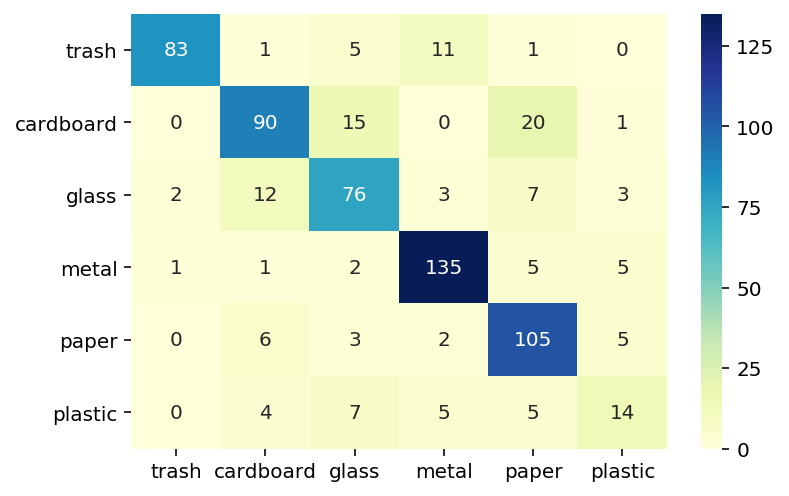

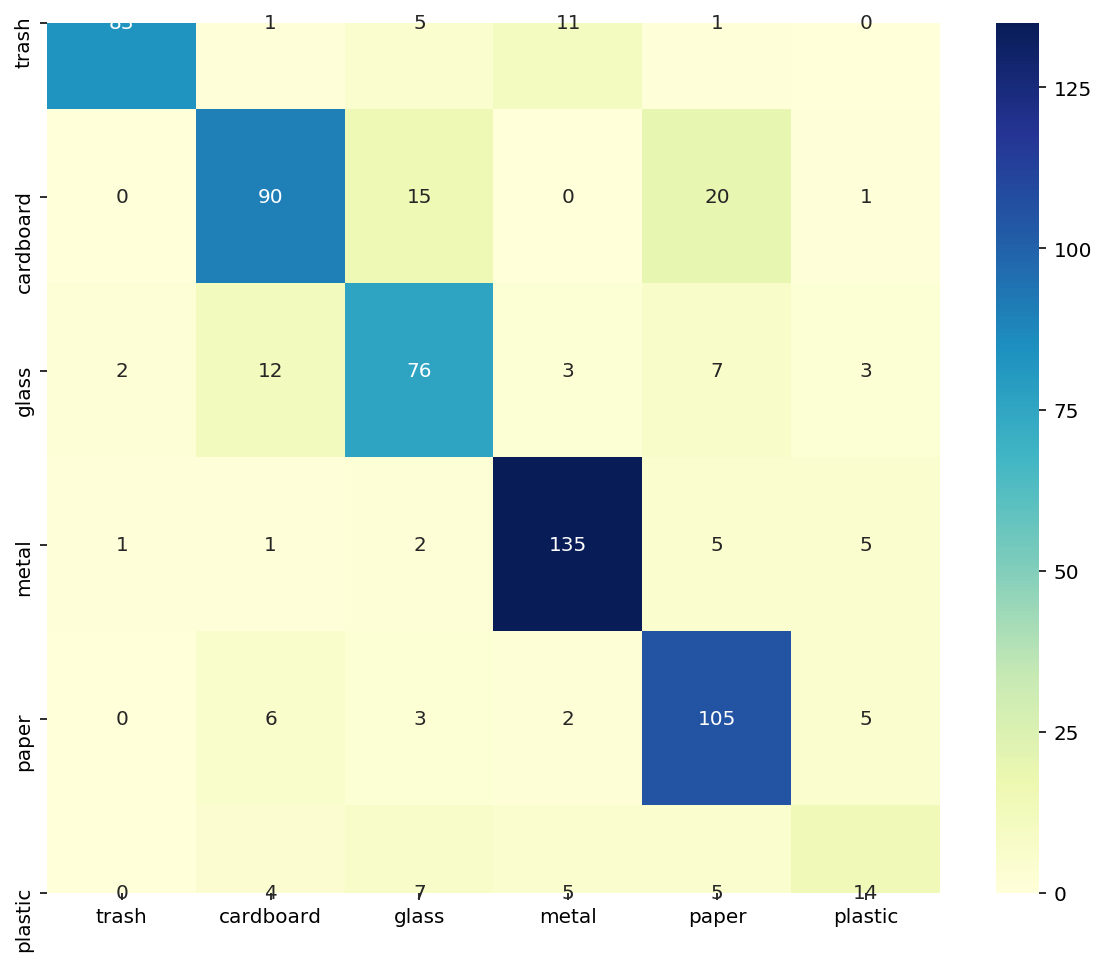

In [21]:
## CALCULATE AND VISUALIZE CONFUSION MATRIX
cm18_20 = confusion_matrix(y,yhat18_20)
# resnet18 CM
df_cm = pd.DataFrame(cm18_20,waste_types,waste_types)
ax = sns.heatmap(df_cm,annot=True,fmt="d",cmap="YlGnBu")

ax.set_ylim(6.0, 0.0)
plt.figure(figsize=(10,8))
sns.heatmap(df_cm,annot=True,fmt="d",cmap="YlGnBu")


In [21]:
## ACCURACY CALCULATIONS
# CORRECT FOR YHAT 18
correct18 = 0

for r in range(len(cm18)):
    for c in range(len(cm18)):
        if (r==c):
            correct18 += cm18[r,c]
            

In [22]:
## ACCURACY CALCULATIONS
# CORRECT FOR YHAT 18
correct18_20 = 0

for r in range(len(cm18_20)):
    for c in range(len(cm18_20)):
        if (r==c):
            correct18_20 += cm18_20[r,c]
            

In [22]:
## CONVERT STRINGS TO NUMBERS FOR ACCURACY CALCS
waste_types = ['trash','cardboard','glass','metal','paper','plastic']

image_actual = []
image_predicted18 = []

       
for pred in y:
    image_actual.append(waste_types.index(pred))
    
for pred in yhat18:
    image_predicted18.append(waste_types.index(pred))
    
#Accuracy resnet 18
accuracy18 = correct18/sum(sum(cm18))
print ("resnet 18 model", accuracy18)

resnet 18 model 0.7307086614173228


In [19]:
## CONVERT STRINGS TO NUMBERS FOR ACCURACY CALCS for 20 EPOCHS
waste_types = ['trash','cardboard','glass','metal','paper','plastic']

image_actual = []
image_predicted18_20 = []

       
for pred in y:
    image_actual.append(waste_types.index(pred))
    
for pred in yhat18:
    image_predicted18_20.append(waste_types.index(pred))
    
#Accuracy resnet 18
accuracy18_20 = correct18_20/sum(sum(cm18_20))
print ("resnet 18 model", accuracy18_20)

resnet 18 model 0.7921259842519685
